# Lecture Timeseries (1): Examples

This notebook contains examples for the lecture Timeseries (1)

In [52]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import acf

## Demo: naive forecast with example data

This demo shows an example of a naive forecast using some synthetic data (numbers from 1 to 7), ordered.

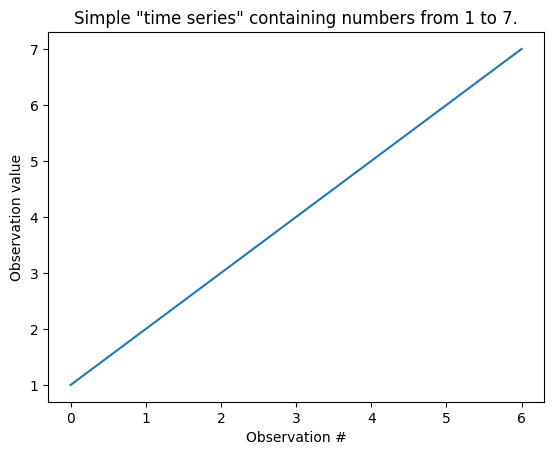

In [4]:
ts = [1, 2, 3, 4, 5, 6, 7]

pd.Series(ts).plot()
plt.title('Simple "time series" containing numbers from 1 to 7.')
plt.xlabel("Observation #")
plt.ylabel("Observation value")
plt.show()

The next number in this series would be 8. If we were to use naive forecasting, we would predict 7. How bad is this prediction?

The absolute error is 1 (of course). Is that good or bad? We don't know. Let's calculate the absolute percentage error.

In [10]:
# The predicted next value in the series is:
ts_next = ts[-1]

# The real next value in the series is:
real_ts_next = ts[-1] + 1

# The absolute percentage error for the predicted value is:
print(f"The absolute percentage error of our prediction is {abs((ts_next - real_ts_next) / real_ts_next) * 100 :.2f}%")



The absolute percentage error of our prediction is 12.50%


Not terrible.

## Demo: manual ARMA

Let's manually perform an ARMA prediction on the time series. We need  coefficients for this ($\beta_1, \beta_2, ..., \beta_k$). Finding out what these are is usually done by training. For this example let's simply give the last observation a weight of 1, the next to last one a weight of 0.1 and all the other observations a weight of 0.

In [30]:
weights = [0 for i in ts]
weights[-1] = 1
weights[-2] = 0.1
weights


[0, 0, 0, 0, 0, 0.1, 1]

Calculating the residuals is a bit tricky. Basically for every value except the first we need to calculate what the error would have been (the residual). The method below for doing this works, but is of course not elegant.

In [ ]:
residuals  = [0] # The first residual is 0, because we cannot predict it
predicted = [1] # For demonstration purposes
for i in range(1, len(ts)):
    prev = ts[i - 1]
    prev_prev = ts[i - 2]
    predicted.append((prev * 1) + (prev_prev * 0.1))
    residuals.append(((prev * 1) + (prev_prev * 0.1)) - ts[i])

print(f'Real observations:\t{ts}')
print(f'Predicted observations:\t{predicted}')
print(f'Residuals:\t\t{residuals}')





Real observations:	[1, 2, 3, 4, 5, 6, 7]
Predicted observations:	[1, 1.7000000000000002, 2.1, 3.2, 4.3, 5.4, 6.5]
Residuals:		[0, -0.2999999999999998, -0.8999999999999999, -0.7999999999999998, -0.7000000000000002, -0.5999999999999996, -0.5]


Now let's combine the auto regression and the moving average (calculated by giving all but the last two values of the residuals a weight of 0) to predict the next value in the series

In [36]:
ma_weights = [0 for residual in residuals]
ma_weights[-1] = 1
ma_weights[-2] = 1
print(f'Weights for residuals:\t{ma_weights}')
arma = 0
for i in range(0, len(ts)):
    weight = weights[i]
    ma_weight = ma_weights[i]
    arma += ts[i] * weight
    arma += residuals[i] * ma_weight

print(f"Predicted value is {arma}. The absolute percentage error for this prediction is {abs((arma - ts[-1]) / ts[-1]) * 100 :.2f}%")


Weights for residuals:	[0, 0, 0, 0, 0, 1, 1]
Predicted value is 6.5. The absolute percentage error for this prediction is 7.14%


As you can see, even in this simple and highly artificial case ARMA performs better than naive forecasting.

NOTE: in "real" ARMA processing happens in reverse order (newest to oldest).

# Demo: manual ARMA, non-working

ARMA makes a few assumptions about the data. Here we see an example where ARME does not work.

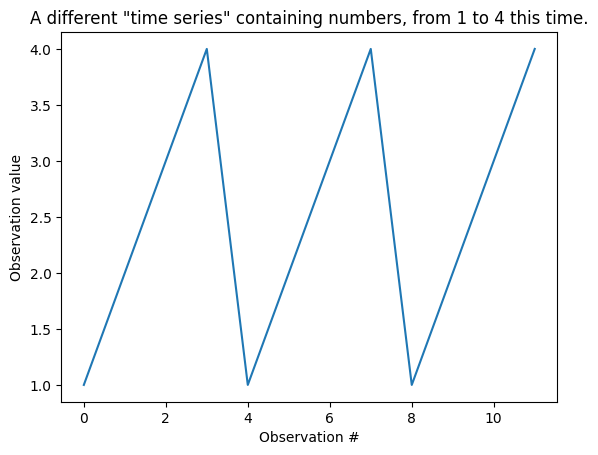

In [39]:
ts2 = [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]

pd.Series(ts2).plot()
plt.title('A different "time series" containing numbers, from 1 to 4 this time.')
plt.xlabel("Observation #")
plt.ylabel("Observation value")
plt.show()

Once again, let's manually perform an ARMA prediction of the next value.

In [51]:
weights2 = [0 for i in ts2]
weights2[-1] = 1
weights2[-2] = 0.1
print(f'Weights:\t\t{weights2}')
residuals2  = [0] # The first residual is 0, because we cannot predict it
predicted2 = [1] # For demonstration purposes
for i in range(1, len(ts2)):
    prev = ts2[i - 1]
    prev_prev = ts2[i - 2]
    predicted2.append((prev * 1) + (prev_prev * 0.1))
    residuals2.append(((prev * 1) + (prev_prev * 0.1)) - ts2[i])

print(f'Real observations:\t{ts2}')
print(f'Predicted observations:\t{predicted2}')
print(f'Residuals:\t\t{residuals2}')

ma_weights2 = [0 for residual in residuals2]
ma_weights2[-1] = 1
ma_weights2[-2] = 1
print(f'Weights for residuals:\t{ma_weights2}')
arma2 = 0
for i in range(0, len(ts2)):
    weight = weights2[i]
    ma_weight = ma_weights2[i]
    arma2 += ts2[i] * weight
    arma2 += residuals2[i] * ma_weight

print(f"Predicted value is {arma2}. The absolute percentage error for this prediction is {abs((arma2 - ts2[-1]) / ts2[-1]) * 100 :.2f}%")




Weights:		[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 1]
Real observations:	[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
Predicted observations:	[1, 1.4, 2.1, 3.2, 4.3, 1.4, 2.1, 3.2, 4.3, 1.4, 2.1, 3.2]
Residuals:		[0, -0.6000000000000001, -0.8999999999999999, -0.7999999999999998, 3.3, -0.6000000000000001, -0.8999999999999999, -0.7999999999999998, 3.3, -0.6000000000000001, -0.8999999999999999, -0.7999999999999998]
Weights for residuals:	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
Predicted value is 2.6000000000000005. The absolute percentage error for this prediction is 35.00%


The reason the prediction is so far off is that ARMA assumes the time series is *stationary*, ie there is no so-called "seasonality" (recurring patterns) in the data.

The second example time series clearly has a recurring pattern, which is why ARMA does not work.

# Demo: using statsmodels.tsa

In practice, we do not, of course, write our own buggy code to work with time series. Instead we use the Python statsmodels.tsa library.

For this example we will again use synthetic data. We will create:

- 3 years of data
- with 4 seasonal cycles per year
- we add a trend of +10 over the full period
- and we add some noise

(this example is copied from RaoulG's https://github.com/raoulg/MADS-DAV/blob/main/notebooks/03.2-statistics-of-time.ipynb)



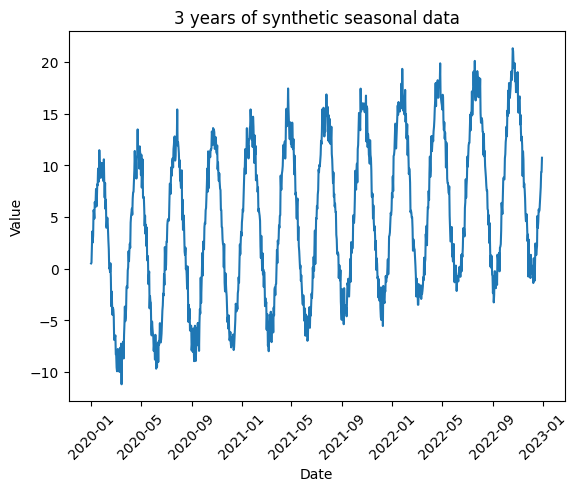

In [56]:
# Generate a date range
years = 3
dates = pd.date_range(start="2020-01-01", periods=365 * years, freq="D")

# Generate synthetic data with seasonality
cycles = 4
np.random.seed(42)
trend = np.linspace(0, 10, len(dates))  # Linear trend
seasonality = 10 * np.sin(
    np.linspace(0, cycles * years * 2 * np.pi, len(dates))
)  # Yearly seasonality
noise = np.random.normal(0, 1, len(dates))  # Random noise
synthetic_data = trend + seasonality + noise

# Create a DataFrame
df = pd.DataFrame({"Date": dates, "Value": synthetic_data})
plt.plot(df["Date"], df["Value"])
plt.xticks(rotation=45)
plt.title('3 years of synthetic seasonal data')
plt.ylabel('Value')
plt.xlabel('Date')
plt.show()

Text(0.5, 0.98, 'Autocorrelation Plot')

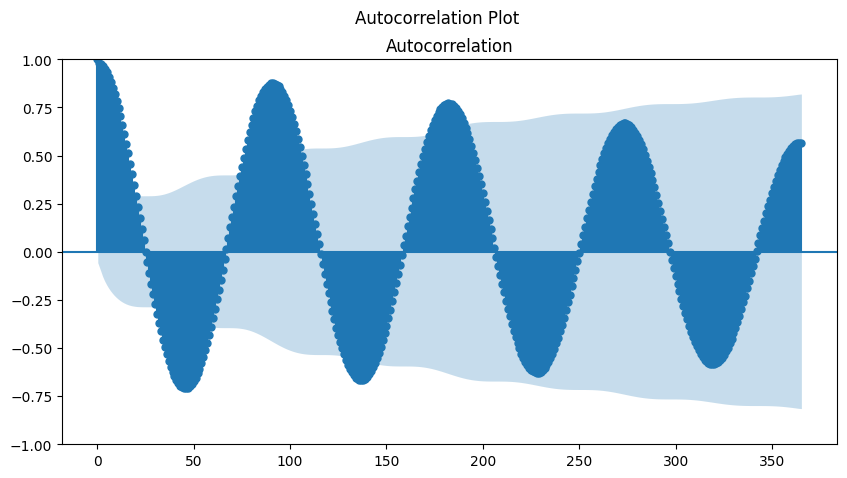

In [57]:
acf_plot = tsaplots.plot_acf(df["Value"], lags=365)

# Adjust the plot size
acf_plot.set_figheight(5)
acf_plot.set_figwidth(10)

# Show the plot
acf_plot.suptitle("Autocorrelation Plot")